# Assignment 2 - Part A: Exploring data

We import the necessary modules.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import math
import numpy as np
import pandas
from collections import Counter

Now we load the data set, from the comma-separated training file, storing it as a list of records, where each record is represented with a dict.

In [2]:
ATTRS_ALL = ["LOCATION", "W", "FINAL_MARGIN", "SHOT_NUMBER", "PERIOD", "GAME_CLOCK", "SHOT_CLOCK", 
             "DRIBBLES", "TOUCH_TIME", "SHOT_DIST", "PTS_TYPE", "CLOSE_DEF_DIST", "Target"]

ATTRS_CATEGORICAL = ["LOCATION", "W", "PERIOD", "PTS_TYPE", "Target"]

def load_basketball_data(filename):
    records = []
    with open(filename, 'rt') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            if len(row) == len(ATTRS_ALL):  # 13 attributes, including the target
                d = {}
                for i, attr in enumerate(ATTRS_ALL):
                    d[attr] = row[i] if attr in ATTRS_CATEGORICAL else float(row[i])
                records.append(d)
    return records

basketball_data = load_basketball_data("data/basketball.train.csv")

## Summary statistics and boxplots

Choose 3 numeric attributes and complete the table with the summary statistics.

| Attribute | Mean | Median | Range | Variance | AAD | MAD | IQR |
| --- | --- | --- | --- | --- | --- | --- | --- |
| SHOT_NUMBER | 6.36 | 5.0 | 35 | 20.6 | 2.66e-14 | -1.36 | 6.0 |
| SHOT_DIST | 12.8 | 12.0 | 43 | 77.2 | -1.5e-15 | -0.78 | 18.0 |
| GAME_CLOCK | 361.29 | 363.0 | 719.0 | 40773.3 | 1.49e-14 | 1.71 | 348.0 |

In [3]:
# Chose "SHOT_NUMBER", "SHOT_DIST" and "GAME_CLOCK" for the numerical attributes
shot_numbers = []
shot_dists = []
game_clocks = []

for i, data in enumerate(basketball_data):
    shot_numbers.append(int(basketball_data[i]['SHOT_NUMBER']))
    shot_dists.append(int(basketball_data[i]['SHOT_DIST']))
    game_clocks.append(float(basketball_data[i]['GAME_CLOCK']))


def mean(values): 
    return sum(values) / len(values) if len(values) > 0 else 0


def median(values):
    values = sorted(values)
    return (values[int(len(values)/2)] if len(values) % 2 != 0 
                                       else mean([values[int(len(values)/2)], values[int(len(values)/2)-1]]))

def variance(values):
    values_mean = mean(values)
    return sum([math.pow(x - values_mean, 2) for x in values]) / (len(values) - 1) if len(values) > 1 else 0


def aad(values, mean): 
    return sum(value - mean for value in values) / len(values)


def mad(values, mean):
    ad = []
    for _, value in enumerate(values): 
        ad.append(value - mean)
    return median(ad)


def iqr(values):
    q75, q25 = np.percentile(values, [75 ,25])
    return q75 - q25


# Shot number statistics
mean_shot_number = mean(shot_numbers)
median_shot_number = median(shot_numbers)
range_shot_number = max(shot_numbers) - min(shot_numbers)
variance_shot_number = variance(shot_numbers)
aad_shot_number = aad(shot_numbers, mean_shot_number)
mad_shot_number = mad(shot_numbers, mean_shot_number)
iqr_shot_number = iqr(shot_numbers)
print("Shot number statistics:\n" +
      "[mean: {0:.3}, median: {1}, range: {2}, variance: {3:.3}, AAD: {4:.3}, MAD: {5:.3}, IQR: {6}]\n".format(
       mean_shot_number, median_shot_number, range_shot_number, 
       variance_shot_number, aad_shot_number, mad_shot_number, iqr_shot_number))

# Shot distance statistics
mean_dist = mean(shot_dists)
median_dist = median(shot_dists)
range_dist = max(shot_dists) - min(shot_dists)
variance_dist = variance(shot_dists)
aad_dist = aad(shot_dists, mean_dist)
mad_dist = mad(shot_dists, mean_dist)
iqr_dist = iqr(shot_dists)
print("Shot distance statistics:\n" +
      "[mean: {0:.3}, median: {1}, range: {2}, variance: {3:.3}, AAD: {4:.3}, MAD: {5:.3}, IQR: {6}]\n".format(
       mean_dist, median_dist, range_dist,
       variance_dist, aad_dist, mad_dist, iqr_dist))

# Game clock statistics
mean_game_clock = mean(game_clocks)
median_game_clock = median(game_clocks)
range_game_clock = max(game_clocks) - min(game_clocks)
variance_game_clock = variance(game_clocks)
aad_game_clock = aad(game_clocks, mean_game_clock)
mad_game_clock = mad(game_clocks, mean_game_clock)
iqr_game_clock = iqr(game_clocks)
print("Game clock statistics:\n" +
      "[mean: {0:.5}, median: {1}, range: {2}, variance: {3:.6}, AAD: {4:.3}, MAD: {5:.3}, IQR: {6}]\n".format(
       mean_game_clock, median_game_clock, range_game_clock, 
       variance_game_clock, aad_game_clock, mad_game_clock, iqr_game_clock))


Shot number statistics:
[mean: 6.36, median: 5.0, range: 35, variance: 20.6, AAD: 2.66e-14, MAD: -1.36, IQR: 6.0]

Shot distance statistics:
[mean: 12.8, median: 12.0, range: 43, variance: 77.2, AAD: -1.5e-15, MAD: -0.78, IQR: 18.0]

Game clock statistics:
[mean: 361.29, median: 363.0, range: 719.0, variance: 40773.3, AAD: 1.49e-14, MAD: 1.71, IQR: 348.0]



For one of those 3 attributes, plot in a single figure 2 boxplots, one per each of the 2 classes.

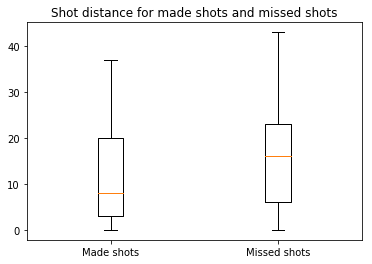

In [4]:
# Chose "SHOT_DIST" for plotting
made_shot_dist = []
missed_shot_dist = []

for i, data in enumerate(basketball_data):
    if basketball_data[i]['Target'].lower() == 'made':
        made_shot_dist.append(int(basketball_data[i]['SHOT_DIST']))
    elif basketball_data[i]['Target'].lower() == 'missed':
        missed_shot_dist.append(int(basketball_data[i]['SHOT_DIST']))

arr = np.array([made_shot_dist, missed_shot_dist], float)
tarr = np.transpose(arr)  # transpose the array, to have attributes as columns

plt.clf()  
plt.boxplot(tarr, labels=['Made shots', 'Missed shots'])
plt.title('Shot distance for made shots and missed shots')
plt.show()

## Binarization, histograms and scatter plots

You can easily know which are all the possible values of an attribute by converting into a set its list of values.

Choose 2 categorical attributes (different from the target) and plot each distribution in a histogram.

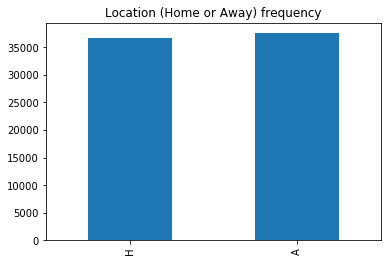

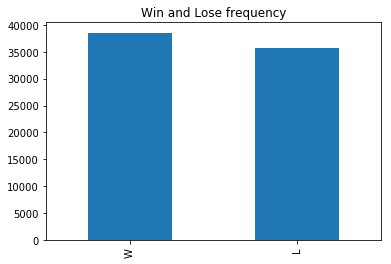

In [5]:
# Chose LOCATION and W for distribution plotting
locations = []
ws = []

for i, data in enumerate(basketball_data):
    locations.append(basketball_data[i]['LOCATION'].upper())
    ws.append(basketball_data[i]['W'].upper())

loc_counts = Counter(locations)
df = pandas.DataFrame.from_dict(loc_counts, orient='index')
df.plot(kind='bar', legend=False)
plt.title('Location (Home or Away) frequency')
plt.show()

w_counts = Counter(ws)
df = pandas.DataFrame.from_dict(w_counts, orient='index')
df.plot(kind='bar', legend=False)
plt.title('Win and Lose frequency')
plt.show()

Binarize all the categorical attributes (different from the target) to obtain a dataset where each record is a list of zeros and non-zero values.

In [6]:
def binarize(record):
    period = [1, 2, 3, 4, 5, 6]
    points = [1, 2, 3]
    records = []
    record_bin = []

    for i, data in enumerate(record):
        # Location: either H or A.
        if record[i]['LOCATION'] == 'H':
            record_bin += [1, 0]
        else:
            record_bin += [0, 1]

        # W: either W or L.
        if record[i]['W'] == 'W':
            record_bin += [1, 0]
        else:
            record_bin += [0, 1]
        
        # Period: 6 bits
        period_vect = [0, 0, 0, 0, 0, 0]
        for idx, val in enumerate(period):
            if record[i]['PERIOD'] == val:
                period_vect[idx] = 1
                record_bin = record_bin + period_vect

        # Points: 3 bits
        points_vect = [0, 0, 0]
        for idx, val in enumerate(points):
            if record[i]['PTS_TYPE'] == val:
                points_vect[idx] = 1
                record_bin = record_bin + points_vect

        records.append(record_bin)

    print('Length of binarized dataset: {0}'.format(len(records)))
    return records

binarized_dataset = binarize(basketball_data)

Length of binarized dataset: 74286


Choose 2 numeric attributes and compare them in a scatter plot, with different colors per each class.

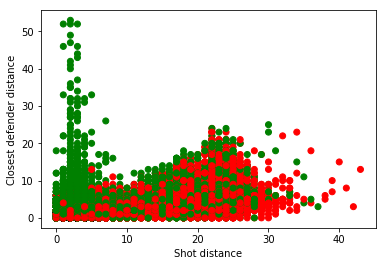

In [7]:
# Chose SHOT_DIST and CLOSE_DEF_DIST for scatter plot comparison
shot_dists = []
close_def_dists = []
c = []
        
for i, data in enumerate(basketball_data):
    shot_dists.append(int(basketball_data[i]['SHOT_DIST']))
    close_def_dists.append(int(basketball_data[i]['CLOSE_DEF_DIST']))
    if basketball_data[i]['Target'].lower() == 'made':
        c.append('green')  # Green for made shot
    elif basketball_data[i]['Target'].lower() == 'missed':
        c.append('red')  # Red for missed shot
        
plt.clf()  
plt.scatter(shot_dists, close_def_dists, c=c)
plt.xlabel('Shot distance')
plt.ylabel('Closest defender distance')
plt.show()
